In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
data= pd.read_csv('Fraud_check.csv')

In [3]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
data.rename({'Undergrad':'UG','Marital.Status':'MS', 'Taxable.Income':'TI', 'City.Population':'CP', 'Work.Experience':'WE'},axis = 1, inplace = True)

In [6]:
data

,UG,MS,TI,CP,WE,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   UG      600 non-null    object
 1   MS      600 non-null    object
 2   TI      600 non-null    int64 
 3   CP      600 non-null    int64 
 4   WE      600 non-null    int64 
 5   Urban   600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [8]:
data['UG']=data['UG'].astype('category')
data['MS']=data['MS'].astype('category')
data['Urban']=data['Urban'].astype('category')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   UG      600 non-null    category
 1   MS      600 non-null    category
 2   TI      600 non-null    int64   
 3   CP      600 non-null    int64   
 4   WE      600 non-null    int64   
 5   Urban   600 non-null    category
dtypes: category(3), int64(3)
memory usage: 16.3 KB


In [10]:
label_encoder=preprocessing.LabelEncoder()
data['UG'] = label_encoder.fit_transform(data['UG'])
data['Urban'] = label_encoder.fit_transform(data['Urban'])
data['MS'] = label_encoder.fit_transform(data['MS'])

In [11]:
data

,UG,MS,TI,CP,WE,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [15]:
data['TI'] = data.TI.map(lambda taxable_income : 'Risky' if taxable_income <= 30000 else 'Good')

In [18]:
data['TI'] = label_encoder.fit_transform(data['TI'])

In [19]:
data['TI'].unique()

array([0, 1])

In [20]:
data['TI'].value_counts()

0    476
1    124
Name: TI, dtype: int64

In [23]:
x = data.iloc[:,[0,1,3,4,5]]
y = data.iloc[:,2]

In [24]:
x

,UG,MS,CP,WE,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [25]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: TI, Length: 600, dtype: int32

In [26]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

### Building Decision Tree Classifier using Entropy Criteria

In [27]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

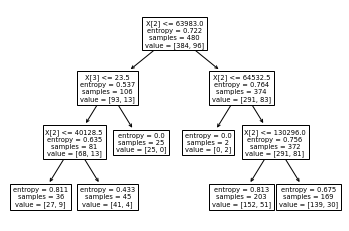

In [28]:
tree.plot_tree(model);

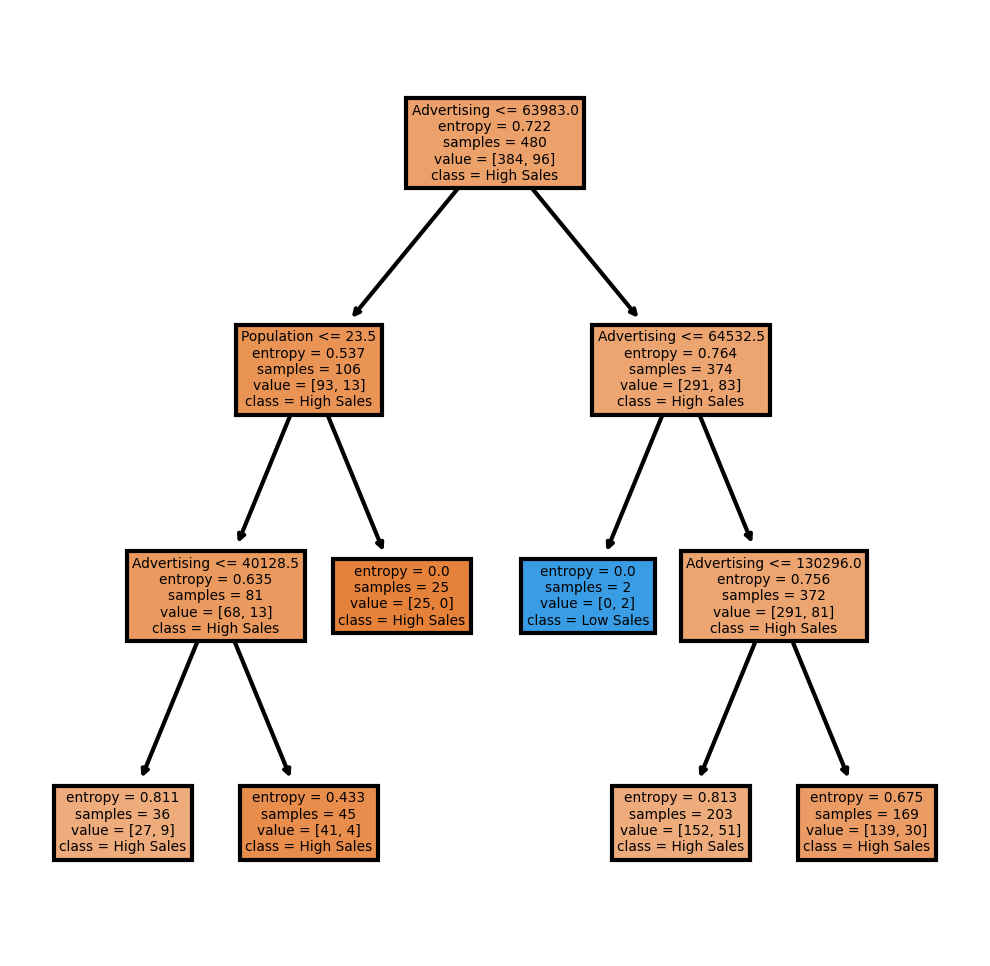

In [29]:
fn=['CompPrice','Income','Advertising','Population','Price','shelveLoc','Age','Education','Urban','US']
cn=['High Sales', 'Low Sales']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

#### Predicting on test data

In [30]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

0    120
dtype: int64

In [31]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [32]:
pd.crosstab(y_test,preds) 

col_0,0
TI,
0,92
1,28


In [33]:
np.mean(preds==y_test)

0.7666666666666667

#### As we can see accuracy is 76.67%

### Building Decision Tree Classifier (CART) using Gini Criteria

In [34]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [35]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [36]:
pred=model.predict(x_test)
np.mean(preds==y_test)

0.7666666666666667